In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/predictive_maintenance.csv')

### Data Overview
Let's get a general understanding of the dataset's structure, including the number of entries, columns, data types, and non-null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Descriptive Statistics
Next, let's look at the descriptive statistics for numerical columns, which will provide insights into their central tendency, dispersion, and shape.

In [ ]:
display(df.describe())

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. LOAD DATA
# Assuming your file is named 'maintenance_data.csv'
df = pd.read_csv('/content/predictive_maintenance.csv')

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
# 2. CLEANING & PREPROCESSING
# Drop ID columns (UDI, Product ID) as they confuse the model
# Note: Adjust column names if they are slightly different in your full CSV
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [ ]:
# Encode the 'Type' column (L, M, H -> 0, 1, 2)
le_type = LabelEncoder()
X['Type'] = le_type.fit_transform(X['Type'])

In [ ]:
# 3. STRATEGY STEP 1: BINARY MODEL (Failure vs Not)
y_binary = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)



In [ ]:
# Calculate weighting for imbalance (No Failure count / Failure count)
# This prevents the model from just guessing "0" every time
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model_binary = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)

In [ ]:
model_binary.fit(X_train_cleaned, y_train)

print("=== STEP 1: BINARY MODEL RESULTS ===")
# We verify if it can catch the failures
print(classification_report(y_test, model_binary.predict(X_test_cleaned)))

=== STEP 1: BINARY MODEL RESULTS ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.66      0.74      0.70        61

    accuracy                           0.98      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.98      0.98      0.98      2000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# 4. STRATEGY STEP 2: MULTI-CLASS MODEL (Failure Type)
# We filter the data to train ONLY on actual failures
train_failures = df[df['Target'] == 1].copy()
X_failures = train_failures.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)

# Apply column name cleaning to X_failures
X_failures = clean_col_names(X_failures.copy())

# Re-fit le_type on the original 'Type' column from df to ensure correct string-to-int mapping
# This addresses the potential state inconsistency of the previously fitted le_type
le_type_re_fit = LabelEncoder()
le_type_re_fit.fit(df['Type'])

# Transform the 'Type' column in X_failures using the correctly fitted encoder
X_failures['Type'] = le_type_re_fit.transform(X_failures['Type'])

In [ ]:
# 4. STRATEGY STEP 2: MULTI-CLASS MODEL (Failure Type)
# We filter the data to train ONLY on actual failures
train_failures = df[df['Target'] == 1].copy()
X_failures = train_failures.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)

# Apply column name cleaning to X_failures for XGBoost compatibility
X_failures = clean_col_names(X_failures.copy())

# Use the correctly fitted encoder 'le_type_re_fit' from the previous cell (2t9sVHfUBlxt)
X_failures['Type'] = le_type_re_fit.transform(X_failures['Type'])

# Encode the text targets (e.g., "Heat Failure" -> 0, "Power Failure" -> 1)
y_failures_text = train_failures['Failure Type']
le_failure = LabelEncoder()
y_failures_encoded = le_failure.fit_transform(y_failures_text)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_failures, y_failures_encoded, test_size=0.2, random_state=42)

model_type = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_failure.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

model_type.fit(X_train_f, y_train_f)

print("\n=== STEP 2: FAILURE TYPE MODEL RESULTS ===")
# Decode predictions back to text (0 -> "Overstrain Failure") to check results
preds = model_type.predict(X_test_f)
print(classification_report(y_test_f, preds, target_names=le_failure.classes_))


=== STEP 2: FAILURE TYPE MODEL RESULTS ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        21
              No Failure       0.75      1.00      0.86         3
      Overstrain Failure       0.94      1.00      0.97        17
           Power Failure       0.85      0.92      0.88        12
       Tool Wear Failure       1.00      0.87      0.93        15

                accuracy                           0.94        68
               macro avg       0.91      0.95      0.92        68
            weighted avg       0.95      0.94      0.94        68



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:25:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
from sklearn.metrics import precision_score, recall_score

# Get the raw probability numbers (0.0 to 1.0) instead of just 0 or 1
y_probs = model_binary.predict_proba(X_test_cleaned)[:, 1]

# Try a lower threshold to catch more failures (Prioritize Recall)
threshold = 0.3  # If prob > 30%, call it a failure
y_pred_new = (y_probs > threshold).astype(int)

print(f"--- Threshold: {threshold} ---")
print(f"Precision: {precision_score(y_test, y_pred_new):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_new):.2f}")

--- Threshold: 0.3 ---
Precision: 0.57
Recall:    0.75


In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 1. Get the probability of failure (0.0 to 1.0) for each row
# We take column [1] because that is the probability of "Class 1" (Failure)
y_probs = model_binary.predict_proba(X_test_cleaned)[:, 1]

# 2. Define the thresholds we want to test (0.1, 0.2 ... 0.9)
thresholds = np.arange(0.1, 1.0, 0.1)

results = []

print(f"{'Threshold':<10} | {'Recall (Catch Rate)':<20} | {'Precision (Trust)':<18} | {'F1-Score':<10} | {'False Alarms'}")
print("-" * 85)

for thresh in thresholds:
    # Apply the threshold
    y_pred_custom = (y_probs >= thresh).astype(int)

    # Calculate metrics
    rec = recall_score(y_test, y_pred_custom, zero_division=0)
    prec = precision_score(y_test, y_pred_custom, zero_division=0)
    f1 = f1_score(y_test, y_pred_custom, zero_division=0)

    # Count specific errors using Confusion Matrix
    # tn = true negative, fp = false positive (False Alarm), fn = false negative (Missed Failure), tp = true positive
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()

    print(f"{thresh:.1f}        | {rec:.1%}               | {prec:.1%}             | {f1:.2f}       | {fp}")

print("-" * 85)

Threshold  | Recall (Catch Rate)  | Precision (Trust)  | F1-Score   | False Alarms
-------------------------------------------------------------------------------------
0.1        | 78.7%               | 49.5%             | 0.61       | 49
0.2        | 77.0%               | 54.7%             | 0.64       | 39
0.3        | 75.4%               | 57.5%             | 0.65       | 34
0.4        | 73.8%               | 63.4%             | 0.68       | 26
0.5        | 73.8%               | 66.2%             | 0.70       | 23
0.6        | 70.5%               | 70.5%             | 0.70       | 18
0.7        | 67.2%               | 77.4%             | 0.72       | 12
0.8        | 59.0%               | 83.7%             | 0.69       | 7
0.9        | 57.4%               | 92.1%             | 0.71       | 3
-------------------------------------------------------------------------------------


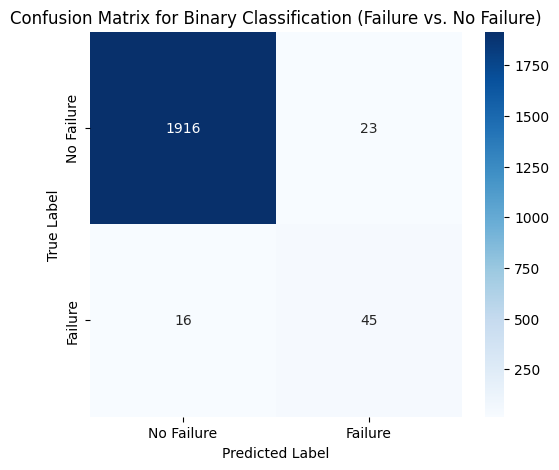

Confusion Matrix:
                 Predicted No Failure  Predicted Failure
True No Failure                  1916                 23
True Failure                       16                 45


In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the binary classification model
y_pred_binary = model_binary.predict(X_test_cleaned)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Define labels for the confusion matrix (0: No Failure, 1: Failure)
labels = ['No Failure', 'Failure']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Binary Classification (Failure vs. No Failure)')
plt.show()

print("Confusion Matrix:")
print(pd.DataFrame(cm, index=['True No Failure', 'True Failure'], columns=['Predicted No Failure', 'Predicted Failure']))

In [56]:
import joblib

class MaintenancePredictor:
    def __init__(self, binary_model, type_model, threshold=0.3):
        self.binary_model = binary_model
        self.type_model = type_model
        self.threshold = threshold
        # Hardcoded labels based on your encoder
        self.type_labels = ["Heat Failure", "No Failure", "Overstrain Failure", "Power Failure", "Tool Wear Failure"]

    def predict(self, new_data):
        # 1. Get Probability of Failure
        prob = self.binary_model.predict_proba(new_data)[:, 1]

        # 2. Apply Custom Threshold
        is_failure = (prob >= self.threshold).astype(int)

        results = []
        for i, failure_detected in enumerate(is_failure):
            if failure_detected == 0:
                results.append("Normal Operation")
            else:
                # 3. If Failure, predict the TYPE using the 2nd model
                # We need to reshape data for single prediction
                row = new_data.iloc[[i]]
                type_pred = self.type_model.predict(row)[0]
                results.append(f"ALERT: {self.type_labels[type_pred]}")

        return results

# --- SAVE YOUR WORK ---
# Create the final system
final_system = MaintenancePredictor(model_binary, model_type, threshold=0.3)

# Test it on 5 random rows from your test set
sample_data = X_test_cleaned.sample(5) # Changed from X_test.sample(5) to X_test_cleaned.sample(5)
print("=== LIVE PREDICTIONS ===")
print(final_system.predict(sample_data))

# Save to file (so you can load it in a web app or dashboard later)
joblib.dump(final_system, 'preventive_maintenance_system.pkl')
print("\nSystem saved as 'preventive_maintenance_system.pkl'")

=== LIVE PREDICTIONS ===
['Normal Operation', 'Normal Operation', 'Normal Operation', 'Normal Operation', 'Normal Operation']

System saved as 'preventive_maintenance_system.pkl'
